In [4]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
from sympy.plotting import plot
import ipywidgets as widgets
from ipywidgets import interact
from nm_library import Numeric
nm = Numeric()

In [5]:
%%html
<style> table {display: block} </style>

# Question 1

For $A \in \mathbb{R}^{n\times n}$ prove $\Vert A\Vert _F^2= \mathrm{trace}(A^TA)$ and that $\Vert A\Vert_2 \le \Vert A\Vert_F \le \sqrt{n}\Vert A\Vert_2$.

Give (nontrivial) examples where equality holds, and such where it does not hold!

## Solution

### Proof $\Vert A\Vert_F = \sqrt{trace(A^TA)}$

The Frobenius norm is given as 
$\Vert A\Vert_F = \sqrt{\sum_{i=1}^n\sum_{j=1}^n \vert a_{ij} \vert^2}$

Take $A = 
\begin{pmatrix}
a_{11}& a_{12}\cdots &a_{1n}\\
\vdots& \vdots\cdots &\vdots\\
a_{n1}& a_{n2}\cdots &a_{nn}\\
\end{pmatrix}$

$A^TA = \begin{pmatrix}
a_{11}& a_{21}\cdots &a_{n1}\\
\vdots& \vdots\cdots &\vdots\\
a_{1n}& a_{2n}\cdots &a_{nn}\\
\end{pmatrix}
\begin{pmatrix}
a_{11}& a_{12}\cdots &a_{1n}\\
\vdots& \vdots\cdots &\vdots\\
a_{n1}& a_{n2}\cdots &a_{nn}\\
\end{pmatrix} = 
\begin{pmatrix}
\sum_{i=1}^n a_{i1}^2 & \cdots &\cdots\\
\cdots & \sum_{i=1}^n a_{i2}^2 &\cdots\\
\vdots& \vdots &\vdots\\
\cdots & \cdots &\sum_{i=1}^n a_{in}^2\\
\end{pmatrix}$

$trace(A^TA) = \sum_{j=1}^n \sum_{i=1}^n a_{ij}^2$

$\sqrt{trace(A^TA)} = \sqrt{\sum_{j=1}^n \sum_{i=1}^n a_{ij}^2} = \Vert A\Vert_F$

$\Vert A\Vert_2 = \sqrt{\rho(ATA)}$

Let $\lambda_1$ be the largest eigenvalue of $A^TA$

$\Vert A\Vert_2 = \sqrt{\rho(A^TA)} \le \underbrace{\sqrt{\lambda_1 + \sum_{i=2}^n(\lambda_i)} = \sqrt{trace(A^TA)}}_{\substack{\text{The trace of a matrix is the sum of its eigenvalues.} \\ \text{The determinant is the product of its eigenvalues}}}=\Vert A\Vert_F$

 $\Vert A\Vert_F = \sqrt{trace(A^TA)} = \sqrt{\sum_{i=1}^n \lambda_i} \le \underbrace{\sqrt{n \cdot\max(\lambda_i)}}_{\text{Max eigenvalue}} = \sqrt{n} \underbrace{\sqrt{\max{\lambda_i}}}_{\rho(A^TA)} = \sqrt{n}\Vert A\Vert_2$

### Examples

$A = \begin{pmatrix}
2 & 0\\
0 & 0 \\
\end{pmatrix} \rightarrow
\Vert A \Vert_F = \sqrt{2^2} = 2, ~ \Vert A \Vert_2=2$

$A = \begin{pmatrix}
1 & 0\\
0 & 1 \\
\end{pmatrix} \rightarrow
\Vert A \Vert_F = \sqrt{1+1} = \sqrt{2}, ~ \Vert A \Vert_2=1$

$A = \begin{pmatrix}
0 & 1\\
1 & 0 \\
\end{pmatrix} \rightarrow
\Vert A \Vert_F = \sqrt{1+1} = \sqrt{2}, ~ \Vert A \Vert_2= \sqrt{\rho(A^TA)} = 1$


$A = \begin{pmatrix}
3 & 0 & 1\\
-1 & 1 & -1\\
-2 & 4 & 9\\
\end{pmatrix} \rightarrow
\Vert A \Vert_F = \sqrt{1+1} = \sqrt{2}, ~ \Vert A \Vert_2=1$

In [81]:
A = [[3, 0, 1], [-1, 1, -1], [-2, 4, 9]]

f = np.linalg.norm(A, 'fro'); f
print("Frobenius Norm: ", f)
n2 = np.linalg.norm(A, 2); f
print("2-Norm: ", n2)

Frobenius Norm:  10.677078252031311
2-Norm:  10.059758007839081


# Question 2

Plot the unit spheres in $\mathbb{R}^2$ for the norms $\Vert \cdot\Vert_p$ in the cases of $p\in {1, 2, 3, 4, 8, 16, \infty}$!

## Solution

This was already mentioned in the last class. Now we make a plot of the norms in Python.

Generally, $\Vert \cdot \Vert_p = (\sum_{i=1}^n\vert x \vert^p)^{1/p}$

Abs(v1) + Abs(v2)
v1**2 + v2**2
v1**4 + v2**4
v1**8 + v2**8
v1**16 + v2**16
v1**10 + v2**10


<IPython.core.display.Javascript object>


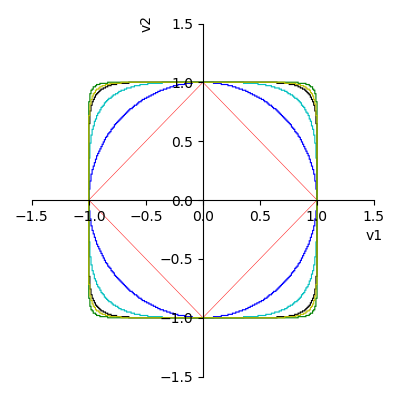

In [101]:
# some toy example to play with
plt.close()
def norm(v, n):
    # v is the vector
    # n is the required norm
    
    if n == 1:
        f = abs(v[0])+abs(v[1])
    elif n == "inf":
        f = Max([abs(v[0]), abs(v[1])])
    else:
        f = v[0]**n + v[1]**n
    print(f)
    return f

# define symbolab symbols
nn = [1, 2, 4, 8, 16, 10]
v1, v2 = symbols("v1 v2")
v = [v1, v2]

plt.rcParams['figure.figsize'] = 4, 4 # some figure formatting
c = ['r', 'b', 'c', 'k', 'g', 'y', 'm']
for i, n in enumerate(nn):
    f = norm(v, n)
    if i == 0:
        p1 = plot_implicit(Eq(f, 1), (v1, -1.5, 1.5), (v2, -1.5, 1.5), show=False, line_color=c[i]) #
    else:
        p2 = plot_implicit(Eq(f, 1), show=False, line_color=c[i])
        p1.extend(p2)
              
p1.show()

# Quetion 3

Let $H$ be the tridiagonal block matrix with $N$ identical blocks$G$ along the main diagonal.

Here is:
$$G = -diag(ov, -1) + 2*eye(n) - diag(ov, +1)$$

with $ov= ones(n-1, 1)$.

Calculate $\Vert H \Vert_1, \Vert H\Vert_2, \Vert H\Vert_{max}, \Vert H\Vert_F$ for $n=3$ and $N=12$!

## Solution

### Some definitions

$\Vert A\Vert_1 = \max_{1\le j\le n} {\sum_{i=1}^n\vert a_{ij}\vert} \rightarrow $ max column sum.

$\Vert A\Vert_\infty = \max_{1\le i\le n} {\sum_{j=1}^n\vert a_{ij}\vert} \rightarrow $ max row sum.

$\Vert A\Vert_2 = \sqrt{\rho(A^TA)} \rightarrow $ maximum eigenvalue of $A^TA$ column sum.

$\Vert A\Vert_F = \sqrt{\sum_{i} \sum_j a_{ij}^2} \rightarrow $ square root of the sum of the square of all elements in the matrix.

$\Vert A\Vert_\max = n\cdot \max_{i,j} {\vert a_{ij} \vert} \rightarrow $ maximum element in matrix multiplied by the dimension of the matrix.


$G = 
\begin{pmatrix}
2 & -1 & 0\\
-1 & 2 & -1 \\
0 & -1 & 2 \\
\end{pmatrix}$

$\Vert G\Vert_1 = \max\{3, 4, 3\} = 4 $

$\Vert G\Vert_2 = \max\{0.585, 2, 3.4142\} = 3.4142 $

$\Vert G\Vert_\infty = \max\{3, 4, 3\} = 4$

$\Vert G\Vert_F = \sqrt{2^2 + (-1)^2 + (-1)^2+ (2)^2+ (-1)^2+ (-1)^2+ (2)^2} = 4$

$\Vert G\Vert_\max = 3\cdot 2 = 6$


#### Side Note

If $A$ is symmetric ($A^T=A$),

$\Vert A \Vert_2 = \sqrt{\rho (A^TA)} = \sqrt{\rho (A^2)} = \rho(A)$\

If A is orthogonal, $A^TA=I\rightarrow \Vert A\Vert_2=\sqrt{\rho A^TA} = \sqrt{\rho(I)} = 1$ 


H is defined a matrix composed of blocks of the tridiagonal matrix $G$.

$\Vert H \Vert_N = 
\begin{pmatrix}
G & \mathbf{0} & \cdots & \mathbf{0}\\
\mathbf{0} & G & \cdots & \mathbf{0} \\
\vdots & \vdots & \vdots & \vdots \\
\mathbf{0} & \mathbf{0} \cdots & & G \\
\end{pmatrix}_{N\times N}$


$\Vert H \Vert_1 = 
\begin{pmatrix}
2 & -1 & 0\\
-1 & 2 & -1 \\
0 & -1 & 2 \\
\end{pmatrix}$

$\Vert H \Vert_2 = 
\begin{pmatrix}
2 & -1 & 0&0 & 0& 0&\\
-1 & 2 & -1&0 & 0& 0& \\
0 & -1 & 2 &0 & 0& 0&\\
0 & 0& 0& 2 & -1 & 0\\
0 & 0 & 0&-1 & 2 & -1 \\
0 & 0& 0& 0& -1 & 2 \\
\end{pmatrix}$

For $N=12$,

$\Vert H\Vert_1 = 4, ~ \Vert H\Vert_2=3.4142, ~\Vert H\Vert_\infty = 4, ~ \Vert H \Vert_F=13.856, ~\Vert H\Vert_\max=72$

# Question 4

Solve the system:

$$Hu = v$$

where $H$ is the block matrix from the previous task and $v\in\mathbb{R}^{36}$ is a vector with components $v_i = (-1)^{(i-1)\mathrm{mod} 3}, i=1, 2, 3, \cdots, 35, 36$.

Compare the effors of Gaussian elimination, $LDL^T, \tilde L \tilde L^T$, the shooting method, Jacobi and Gauss-Seidel methods! 

## Solution

Reminder $a ~\mathrm{mod}~ b$ is the remainder after $a$ is divided by $b$.

<IPython.core.display.Javascript object>


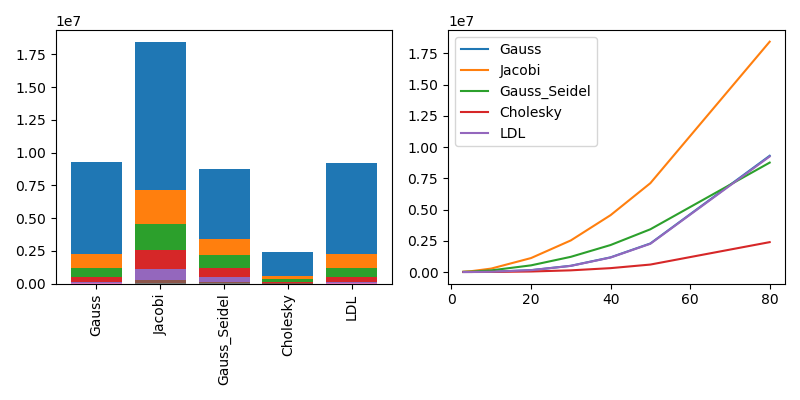

In [78]:
from scipy.linalg import block_diag

# A = [[6.0, 5.0, 1], [5, 5, 1], [1, 1, 1]]
# b = [6, 9, 8]
# A = [[2.0, -1, 0], [-1, 2, -1], [0, -1, 1]]
# b = [1, 0, 0]
# x0 = [1, 1, 1]

n = 3
a = -1 * np.ones(n - 1)  # upper and lower diagonals
b = 2 * np.ones(n)  # main diagonal
G = np.diag(a, -1) + np.diag(b, 0) + np.diag(a, 1)
G = [[2.0, -1, 0], [-1, 2, -1], [0, -1, 1]]

accuracy = 1e-9


def compare_methods(A, b, x0):
    nm = Numeric()
    flops_compare = []
    # gauss
    x, flops_g = nm.gauss(A, b)
    #     print("Gauss: ", np.around(x, 4), flops_g)
    flops_compare.append(flops_g)

    # jacobi
    x, flops_j, steps, error = nm.jacobi(A, b, x0, accuracy)
    #     print("Jacobi: ", np.around(x, 4), flops_j, steps, error)
    flops_compare.append(flops_j)

    # gauss_seidel
    x, flops_gs, steps, error = nm.gauss_seidel(A, b, x0, accuracy)
    #     print("Gaus-Seidel: ", np.around(x, 4), flops_gs, steps, error)
    flops_compare.append(flops_gs)

    # cholesky
    x, L, flops_c = nm.LLT(A, b)
    # L@L.T
    #     print("Cholesky: ", np.around(x, 4), flops_c)
    flops_compare.append(flops_c)

    # LDL
    x, L, D, flops_ldl = nm.LDLT(A, b)
    # L@D@L.T
    #     print("LDL: ", np.around(x, 4), flops_ldl)
    flops_compare.append(flops_ldl)

    #     print("*"*50)
    return flops_compare


# N_list = [80, 50, 40, 30, 20, 10, 5, 3]
N_list = [80, 50, 40, 30, 20, 10, 5, 3]
fl_list = []

for N in N_list:
    H = block_diag(*([G] * N))
    v = [(-1)**((i - 1) % 3) * 1 for i in range(1, n * N + 1)]
    #     v = [1, 0, 0, 1, 0, 0]

    x0 = np.ones(n * N)

    # calculate
    fl = compare_methods(H, v, x0)

    fl_list.append(fl)

# plot flops
plt.close()
plt.rcParams['figure.figsize'] = 8, 4  # some figure formatting
fig, (ax1, ax2) = plt.subplots(1, 2)
x = np.arange(5)
labels = ['Gauss', 'Jacobi', 'Gauss_Seidel', 'Cholesky', 'LDL']

for i, ff in enumerate(fl_list):
    ax1.bar(x, ff)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=90)

fl_list_2 = np.array(fl_list).T

for i, ff in enumerate(fl_list_2):
    ax2.plot(N_list, ff, label=labels[i])
    ax2.legend()
plt.tight_layout()
plt.show()

# Question 5

Consider the Jacobi and Gauss-Seidel methods for systems $Ax=b$ with 

$$A = \begin{pmatrix}5 &0&4\\1&1&4\\0&1&4\\ \end{pmatrix}$$

Study convergence and carry out 12 steps of each method for $b=(6,9,8)^T$!

In [72]:
# to solve, we use the imported nm_library
A = [[5.0, 0.0 , 4.0], [1.0, 1.0, 4.0], [0.0, 1.0, 4.0]]
b = [6, 9, 8]
x0 = [-1, 1, 1]
accuracy = 1e-5
x, flops = nm.gauss(A, b)
print(x, flops)
x, flops, steps, accuracy = nm.gauss_seidel(A, b, x0, accuracy)
print(x, flops, steps, accuracy)

[0.9999999999999998, 6.999999999999999, 0.2500000000000003] 28
[0.9999914365138439, 6.999965746055375, 0.2500085634861562] 921 51 9.082948697011466e-06
